<h2>Assignment 1 - Part 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [1]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [2]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)


# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

intercept:  [30.28894834]

 coefficient [[-1.12463481e-01  3.00810168e-02  4.07309919e-02  2.78676719e+00
  -1.72406347e+01  4.43248784e+00 -6.23998173e-03 -1.44848504e+00
   2.62113793e-01 -1.06390978e-02 -9.16398679e-01  1.24516469e-02
  -5.09349120e-01]]

 Mean Sqaured Error(training data): 10.82

 Mean Sqaured Error(test data): 12.16


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


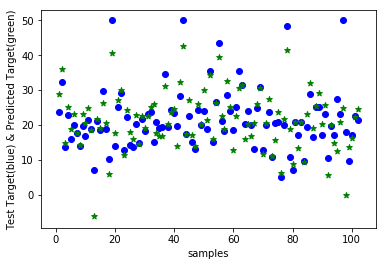

In [3]:
# Task 1-1: use linear regression in sklearn
regrModel = linear_model.LinearRegression()
# fit method uses a Least Sqaures Regression Line equation to to train the model
regrModel.fit(train_data, train_target)  

# Task 1-2: show intercept and coefficents
print ('intercept: ', regrModel.intercept_)
print ('\n coefficient', regrModel.coef_)

# Task 1-3: show errors on training dataset and testing dataset
print ("\n Mean Sqaured Error(training data): %.2f" 
      % ( np.mean( (regrModel.predict(train_data) - train_target) **2) / 2))
print ("\n Mean Sqaured Error(test data): %.2f" 
      % ( np.mean( (regrModel.predict(test_data) - test_target) **2) / 2))

# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
# plt.xlabel('Predicted Prices')
# plt.ylabel('Real Prices')n
# plt.scatter (test_target, regrModel.predict(test_data)) # it should be (x,y), not (y,y)

counter = []
for i in range(1, len(test_data) + 1): 
    counter.append([i])
plt.scatter(counter, test_target, color = 'blue', marker = 'o')
plt.scatter(counter, regrModel.predict(test_data), color = 'green', marker = '*')
plt.ylabel('Test Target(blue) & Predicted Target(green)')
plt.xlabel('samples')
plt.show ()


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

intercept:  [22.79653465]
coefficient [[-0.996232  ]
 [ 0.69558769]
 [ 0.28047684]
 [ 0.71933958]
 [-2.02678678]
 [ 3.14074199]
 [-0.17447147]
 [-3.08322662]
 [ 2.24869616]
 [-1.76573775]
 [-2.03984933]
 [ 1.13874218]
 [-3.61718128]]
 Training data Mean squared error: 10.82
 Testing data Mean squared error: 12.16


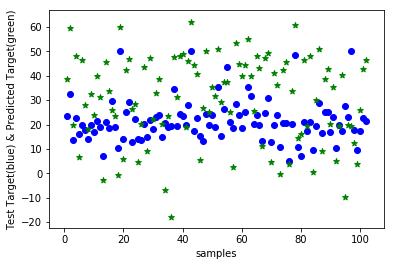

In [52]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    # Analytical Solution: [((X.T) * X)^(-1)][(X.T) * y]
    X_T = np.transpose(X) # X.T
    inverseFirstPart = linalg.inv(np.dot(X_T,X)) # [((X.T) * X)^(-1)]
    secondPart = np.dot(X_T, y) # [(X.T) * y]
    return np.dot(inverseFirstPart, secondPart) # [((X.T) * X)^(-1)][(X.T) * y]
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    # Linear Regression model prediction = w0 + w1x1+ w2x2 + .. wnxn
    # w needs to be a column vector in order to operate matrix multiplication
    # w[1:] -> w1... wn
    return np.dot(X,w[1:]) + w[0] # return 404 predicted labels
    return

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)


# Task 2-3: show intercept and coefficents
print ('intercept: ', w[0])
print ('coefficient', w[1:])

# Task 2-4: show errors on training dataset and testing dataset
print(" Training data Mean squared error: %.2f"
      % (np.mean((myPredictFun(train_data, w) - train_target) ** 2) / 2.0))
print(" Testing data Mean squared error: %.2f"
      % (np.mean((myPredictFun(test_data, w) - test_target) ** 2) / 2.0))


# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
counter = []
for i in range(1, len(test_data) + 1): # +1 becasue intercept is not included
    counter.append([i])
plt.scatter(counter, test_target, color = 'blue', marker = 'o')
plt.scatter(counter, regrModel.predict(test_data), color = 'green', marker = '*')
plt.ylabel('Test Target(blue) & Predicted Target(green)')
plt.xlabel('samples')
plt.show ()

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

intercept:  [22.79653465]
coefficient [[-0.97165664]
 [ 0.6387141 ]
 [ 0.17928876]
 [ 0.73463337]
 [-2.00010846]
 [ 3.16810432]
 [-0.18341496]
 [-3.05532811]
 [ 1.94229103]
 [-1.42911912]
 [-2.02810629]
 [ 1.13723069]
 [-3.60318835]]
 Training data Mean squared error: 10.83
 Testing data Mean squared error: 12.26


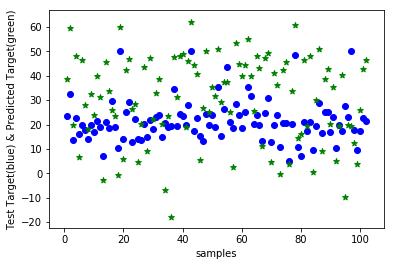

In [49]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X, y, learning_rate, numItrs):
    # initialization of a vector with random weights
    numOfWeights = len(X[0]) # get the number of weights from the training data
    w = np.random.random((1, numOfWeights))   # randomize the 1d array of 14 weights
    w = np.transpose(w)
    
    # update the weights
    # Gradient Descent: (1/N)∑[t^i - y(x^i)]X.T = (1\N)∑[y - X.T(w)]X.T 
    # = (1\N)∑[yi - xi.T(w)]X.T
    # Step: w(next step) = w - learnin_rate(gradients)
    # Repeat the step until until the cost function(L(w)) converges to a minimun
    for i in range(0, 100):
        # gradients = np.dot(y - np.dot(X, w), X.T)  Error! Dimensions need to be aligned
        # Error: y-np.dot(X,w) = (404,1), X.T = (14,404)
        # Matrix Multiplication: [A X B] * [C X D], B NEEDS TO MATCH C.  
        gradients = np.dot(X.T, y - np.dot(X, w)) 
        w = w + (learning_rate * gradients / numOfWeights)
    return w
    
# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    # Linear Regression model prediction = w0 + w1x1+ w2x2 + .. wnxn
    # w needs to be a column vector in order to operate matrix multiplication
    # w[1:] -> w1... wn
    return np.dot(X,w[1:]) + w[0] # add every element by w[0] & return 404 predicted labels

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
eta = 0.01 # learning rate
n_iterations = 1000 # number of iterations
w = myGradientDescentFun(train_data_intercept, train_target, eta, n_iterations)

# Task 3-3: show intercept and coefficents
print ('intercept: ', w[0])
print ('coefficient', w[1:])

# Task 3-4: show errors on training dataset and testing dataset
# get the average of a column vector consisting of the difference between ti and [(y(x(i))^2)/2]
print(" Training data Mean squared error: %.2f"
      % (np.mean((myPredictFun(train_data, w) - train_target) ** 2) / 2.0))
print(" Testing data Mean squared error: %.2f"
      % (np.mean((myPredictFun(test_data, w) - test_target) ** 2) / 2.0))

# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset
counter = []
for i in range(1, len(test_data) + 1): # +1 becasue intercept is not included
    counter.append([i])
plt.scatter(counter, test_target, color = 'blue', marker = 'o')
plt.scatter(counter, regrModel.predict(test_data), color = 'green', marker = '*')
plt.ylabel('Test Target(blue) & Predicted Target(green)')
plt.xlabel('samples')
plt.show ()

<h2>Part 2: Linear Regression on MPG Data</h2>
The goal is to use linear regression to predict MPG( Miles Per Gas) of cars. Also the data will be explored to get information such as correlations between the attributes.
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
   

In [58]:
import matplotlib
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
import numpy as np

In [59]:
# Load CSV and columns
data = pd.read_csv("mpg.csv", index_col=0)

In [60]:
# show a quick description of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 8 to 4
Data columns (total 7 columns):
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
mpg             392 non-null float64
dtypes: float64(3), int64(4)
memory usage: 24.5 KB


382 Entries exist and we can wee that there are no null values. Null values are manually removed.

In [62]:
# display the first 5 rows in the data
data.head()

,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,,,,,,,
8,307.0,130,3504,12.0,70,1,18.0
8,350.0,165,3693,11.5,70,1,15.0
8,318.0,150,3436,11.0,70,1,18.0
8,304.0,150,3433,12.0,70,1,16.0
8,302.0,140,3449,10.5,70,1,17.0


In [63]:
# show a summary of the numerical attributes
data.describe()

,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


The attributes are self-explanatory. 50% of the cars have a MPG lower than 22.75.

In [64]:
# check the shape of the data
np.shape(data)

(392, 7)

In [65]:
# visualize data
import matplotlib.pyplot as plt
# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

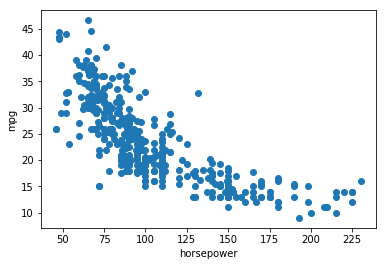

In [67]:
plt.scatter(x=data['horsepower'], y=data['mpg'])
plt.ylabel('mpg')
plt.xlabel('horsepower')
plt.show()

There is a strong correlation between horse power and mpg. The higher horsepower, the lower mpg.

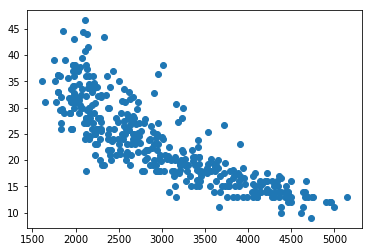

In [68]:
plt.scatter(x=data['weight'], y=data['mpg'])

Obviously, heavier cars will have lower MPG.

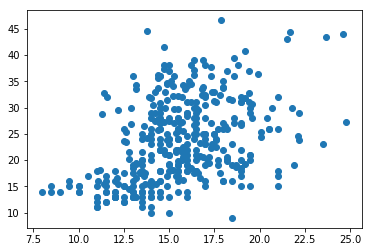

In [69]:
plt.scatter(x=data['acceleration'], y=data['mpg'])

Cars with higher acceleration tend to have higher MPG.

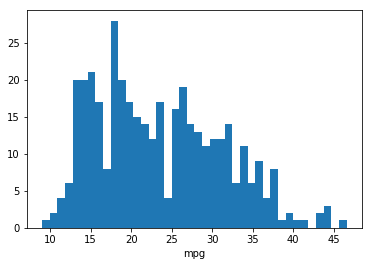

In [70]:
plt.hist(x=data['mpg'], bins = 40)
plt.xlabel('mpg')
plt.show()

This histogram indicates that most cars have the MPG value between 13 and 30. 

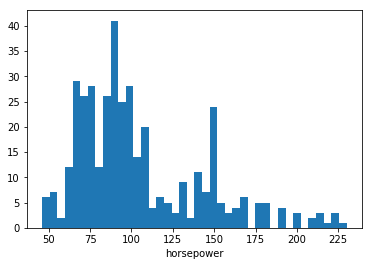

In [71]:
plt.hist(x=data['horsepower'], bins = 40)
plt.xlabel('horsepower')
plt.show()

The majority of the cars in our dataset have the horsepower between 60 and 120

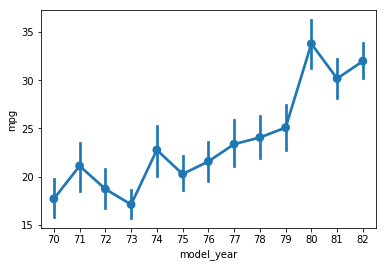

In [72]:
import seaborn as sns
sns.pointplot(x='model_year', y='mpg', data=data)

This graph indicates that new cars tend to have a better mpg compared to the cars that were built in the past.

In [73]:
# Prepare X and Y
X = data[['horsepower', 'weight', 'acceleration']]
y = data['mpg']

3 features(horserpower, weight, and acceleration) will be used to determine the f(x).

In [74]:
# sample data of X
X.head()

,horsepower,weight,acceleration
cylinders,,,
8,130,3504,12.0
8,165,3693,11.5
8,150,3436,11.0
8,150,3433,12.0
8,140,3449,10.5


In [75]:
# sample data of Y
y.head()

cylinders
8    18.0
8    15.0
8    18.0
8    16.0
8    17.0
Name: mpg, dtype: float64

In [77]:
# Split X and y into training and testing sets
# import  
from sklearn.cross_validation import train_test_split
train_data,test_data,train_target,test_target  = train_test_split(X, y, random_state=1)
print(np.shape(test_target))
print(np.shape(test_data))

(98,)
(98, 3)


In [78]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate the linear regression model
lm = LinearRegression()

# fit the model to the training data
lm.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
# Task 1-2: show intercept and coefficents
print ('intercept: ', lm.intercept_)
print ('coefficient', lm.coef_)

intercept:  42.232103077150654
coefficient [-0.03916143 -0.00569037  0.12536131]


In [80]:
# show errors on training dataset and testing dataset
print ("\n Mean Sqaured Error(training data): %.2f" 
      % ( np.mean( (lm.predict(train_data) - train_target) **2) / 2))
      # % ( np.mean( (regrModel.predict(train_data) - train_target) **2) / 2))

print ("\n Mean Sqaured Error(test data): %.2f" 
      % ( np.mean( (lm.predict(test_data) - test_target) **2) / 2))
     # % ( np.mean( (regrModel.predict(test_data) - test_target) **2) / 2))



 Mean Sqaured Error(training data): 8.81

 Mean Sqaured Error(test data): 9.63


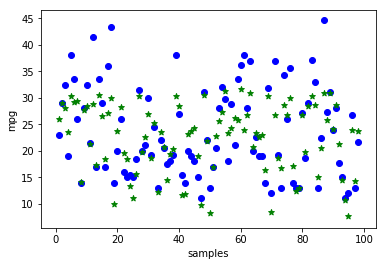

In [81]:
# x-axis will be the number of samples
counter = []
for i in range(1, len(test_data) + 1): 
    counter.append([i])

# create a scatter plot    
plt.scatter(counter, test_target, color = 'blue', marker = 'o')
plt.scatter(counter, lm.predict(test_data), color = 'green', marker = '*')
plt.ylabel('mpg')
plt.xlabel('samples')
plt.show ()